___________
The goal is find insights on messages of whatsapp group. This whatsapp group is about the job in I was working, but it's importat say that messages are about themes relationated of the job, like if somebody wats something of the mall, what time we would go to eat, etc. Nothing that compromises the company where we worked.
___________

# Libraries

We'll use libraries to manipulate mainly dates and visualizations of them. So we'll import *seaborn, pandas* and *datetime*.

In [1]:
import pandas as pd
from datetime import datetime
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
#pd.set_option('display.max_rows', 500)

# Data Preparation

## Data Import

When you download data from whatsapp, the format of the data is special because it doesn't have header and isn't separated by commas, etc. So, we'll import the data with specific parameters:

- sep: 'delimiter'
- header: None
- encoding: 'utf8'
- engine: 'python'

In [2]:
path = '../../../../Data/WhatsApp/Chat Compitas.txt'
df_whatsapp = pd.read_csv(path, sep='delimiter', header=None, encoding='utf8', engine='python')

It's important verify the data is correctly import, because the format of the file can be different in a future and the last parameters have to would change.

In [3]:
df_whatsapp.head(15)

,0
0,8/3/19 13:11 - Los mensajes en este grupo ahor...
1,"8/3/19 13:04 - ‎P4 creó el grupo ""Bendita entr..."
2,8/3/19 13:11 - ‎P4 te añadió
3,8/3/19 13:14 - P1: XD
4,8/3/19 13:15 - P2: Quien es P3 y quien ea P5?
5,8/3/19 13:15 - P2: 🤔
6,8/3/19 13:16 - P3: <Multimedia omitido>
7,8/3/19 13:17 - P2: Va jeje
8,8/3/19 13:25 - P4: Naaa mms P2
9,8/3/19 13:25 - P4: Jajajaja


In [4]:
df_whatsapp.shape

(8145, 1)

## Data Cleaning 

The file contains 8,145 rows, but every row isn't a message so we'll make the data cleaning and we'll have a dataset with four columns:
- date (the day, month and year when the message was sent)
- time (the hour and minute when the message was sent)
- person (the person who sent the message)
- message (the text, link, emoji(s) or sticker(s) that was sent in the group)

In [5]:
dict_columns = {'date':[], 'time':[], 'person':[], 'message':[]}
errors = []
for row in range(len(df_whatsapp)):
    whatsapp_message = df_whatsapp.iloc[row][0].split(' - ')
    try:
        dict_columns['message'].append(whatsapp_message[1].split(':')[1])
        dict_columns['date'].append(whatsapp_message[0].split()[0])
        dict_columns['time'].append(whatsapp_message[0].split()[1])
        dict_columns['person'].append(whatsapp_message[1].split(':')[0])
    except:
        errors.append(row)

### Errors View

In [6]:
print('Total error in the WhatsApp group:', len(errors))

Total error in the WhatsApp group: 15


In [7]:
df_whatsapp.loc[errors]

,0
0,8/3/19 13:11 - Los mensajes en este grupo ahor...
1,"8/3/19 13:04 - ‎P4 creó el grupo ""Bendita entr..."
2,8/3/19 13:11 - ‎P4 te añadió
19,11/3/19 17:39 - ‎P4 cambió el ícono de este grupo
20,"11/3/19 17:26 - ‎P4 cambió el asunto de ""Bendi..."
179,27/3/19 13:45 - ‎Cr añadió a Ro
297,2/4/19 13:21 - ‎P3 salió del grupo
448,5/4/19 10:20 - ‎P4 cambió el ícono de este grupo
1078,29/4/19 13:05 - ‎P4 añadió a Ae
1966,7/6/19 10:07 - ‎P2 añadió a P9


We can see the errors are changes within the WhatsApp group, like add other participant or change the name or photo. These are not impact to messages so we can delete these.

*Se puede ver que los errores no aportan a la interacción en mensajes, sino son movimientos que han hecho los administradores. Por tanto, los podemos omitir.*

### Dataframe creating

______
## IMPORTANT: Change the name of every person
______

In [8]:
df = pd.DataFrame(dict_columns)

df.head(10)

,date,time,person,message
0,8/3/19,13:14,P1,XD
1,8/3/19,13:15,P2,Quien es P3 y quien ea P5?
2,8/3/19,13:15,P2,🤔
3,8/3/19,13:16,P3,<Multimedia omitido>
4,8/3/19,13:17,P2,Va jeje
5,8/3/19,13:25,P4,Naaa mms P2
6,8/3/19,13:25,P4,Jajajaja
7,8/3/19,13:25,P4,<Multimedia omitido>
8,8/3/19,13:27,P5,<Multimedia omitido>
9,8/3/19,13:29,P2,Oooo perdon


In [9]:
df.iloc[11, 3]

' 🥺'

## Structure
______________
Before we start to analyze we must verify the data is ready. What is this? Well, the messages have one space in the begining, also there are some messages like "Este mensaje fue eliminado" (This message was delete) or "Esperando este mensaje" (Waiting message) or simply not contain nothing (""). *¿anything?* These type of messages don't help to the analysis, that is the data isn't ready yet, so we're going to help the data to be.

In [10]:
df['message'] = df['message'].apply(lambda x: x[1:])
df = df[~((df['message'] == 'Este mensaje fue eliminado')|(df['message'] == 'Esperando este mensaje')|(df['message'] == ''))].copy()
df.reset_index(inplace = True, drop = True)

In [11]:
df.head(10)

,date,time,person,message
0,8/3/19,13:14,P1,XD
1,8/3/19,13:15,P2,Quien es P3 y quien ea P5?
2,8/3/19,13:15,P2,🤔
3,8/3/19,13:16,P3,<Multimedia omitido>
4,8/3/19,13:17,P2,Va jeje
5,8/3/19,13:25,P4,Naaa mms P2
6,8/3/19,13:25,P4,Jajajaja
7,8/3/19,13:25,P4,<Multimedia omitido>
8,8/3/19,13:27,P5,<Multimedia omitido>
9,8/3/19,13:29,P2,Oooo perdon


In [12]:
df.shape

(8040, 4)

Also, we can see that there are another type of messages that said: "\<Multimedia omitido>", this is reference to stickers, images and audios (rarely). In this case, how I know the context of the group, I think is a good idea let this messages because is a intercation form, if we want to analyze in what moment of the day are there more interaction, these messages we'll help us a lot.

### Some Functions

Now, as part of prepare the data. We're going to make some functions to help us to give the correct format to columns *date* and *time*. This part we can make with the pandas' method *to_timedelta()* or with the library *datetime*. In both cases we have to modify a little the text, in other case the methods wouldn't understand what we want.

In [13]:
def clean_dates_times(text):
    #aux_list = auxiliar list
    aux_list = text.split('/')
    if len(aux_list) == 3:
        return datetime(2000 + int(aux_list[2]), int(aux_list[1]), int(aux_list[0]))
    #datetime(int(aux_list[0]), int(aux_list[1]), int(aux_list[2]))
    elif len(aux_list) == 1:
        aux_list = text.split(':')
        return time(int(aux_list[0]), int(aux_list[1]))

In [14]:
df['date'], df['time'] = df['date'].map(clean_dates_times), df['time'].map(clean_dates_times)

In [15]:
df.head(10)

,date,time,person,message
0,2019-03-08,13:14:00,P1,XD
1,2019-03-08,13:15:00,P2,Quien es P3 y quien ea P5?
2,2019-03-08,13:15:00,P2,🤔
3,2019-03-08,13:16:00,P3,<Multimedia omitido>
4,2019-03-08,13:17:00,P2,Va jeje
5,2019-03-08,13:25:00,P4,Naaa mms P2
6,2019-03-08,13:25:00,P4,Jajajaja
7,2019-03-08,13:25:00,P4,<Multimedia omitido>
8,2019-03-08,13:27:00,P5,<Multimedia omitido>
9,2019-03-08,13:29:00,P2,Oooo perdon


And, we'll create a new variable that it help us to have messages minute to minute. The idea is assign a label, in this case number, to every minute of the day. That is:
- 00:00 $\rightarrow$ 0
- 00:01 $\rightarrow$ 1
- 00:02 $\rightarrow$ 2

So on until...
- 23:57 $\rightarrow$ 1437
- 23:58 $\rightarrow$ 1438
- 23:59 $\rightarrow$ 1439

This we'll achive with a simple equation:

$$\text{label} = \text{hour}*60 + \text{minutes} $$

With the hour times 60 we are converting to minutes, plus the minute we are obtening the minute exact of the day. This will be the label.  

In [16]:
df['label_minutes'] = df['time'].apply(lambda x: x.hour*60 + x.minute)

In [17]:
df.head(10)

,date,time,person,message,label_minutes
0,2019-03-08,13:14:00,P1,XD,794
1,2019-03-08,13:15:00,P2,Quien es P3 y quien ea P5?,795
2,2019-03-08,13:15:00,P2,🤔,795
3,2019-03-08,13:16:00,P3,<Multimedia omitido>,796
4,2019-03-08,13:17:00,P2,Va jeje,797
5,2019-03-08,13:25:00,P4,Naaa mms P2,805
6,2019-03-08,13:25:00,P4,Jajajaja,805
7,2019-03-08,13:25:00,P4,<Multimedia omitido>,805
8,2019-03-08,13:27:00,P5,<Multimedia omitido>,807
9,2019-03-08,13:29:00,P2,Oooo perdon,809


# Analysis

First, we'll see how messages distribute with a histogram plot:

In [18]:
df.describe([i/10 for i in range(1, 10)] + [.95, .99])

,label_minutes
count,8040.000000
mean,886.183085
std,271.488151
min,0.000000
10%,533.000000
20%,684.800000
30%,775.000000
40%,804.000000
50%,863.000000
60%,963.000000


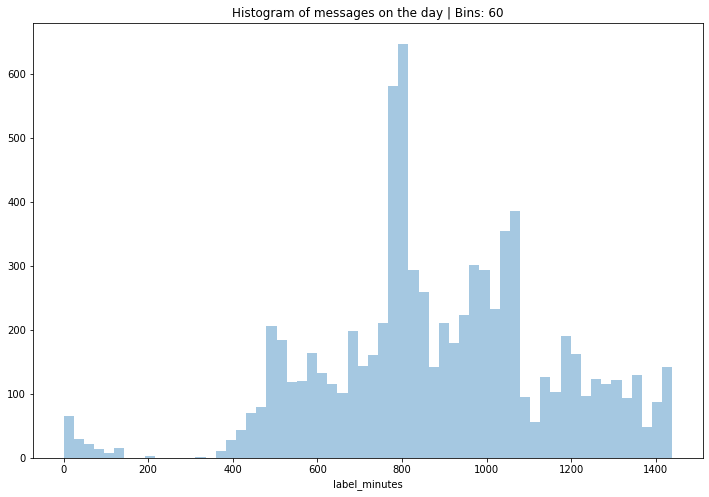

In [19]:
number_bins = 60
plt.figure(figsize=(12, 8))
sns.distplot(df['label_minutes'], hist = True, kde=False, bins=number_bins)
plt.title('Histogram of messages on the day | Bins: ' + str(number_bins))
plt.show()

______________________

Veamos como se ve en un scatter plot:

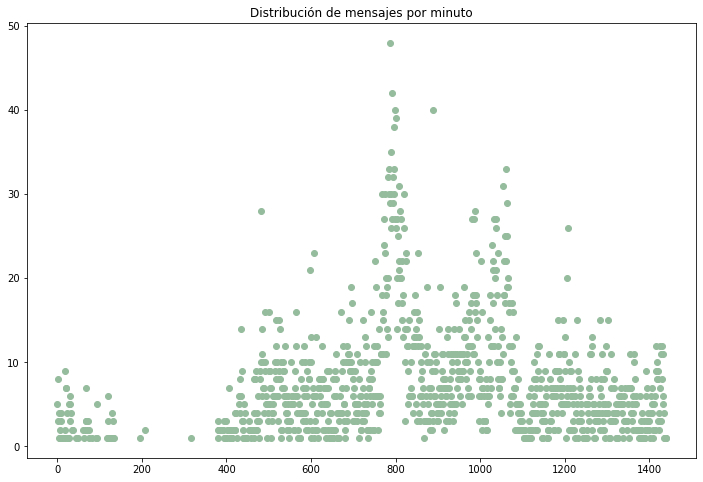

In [20]:
x = df.label_minutes.value_counts().index.tolist()
y = df.label_minutes.value_counts().tolist()

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o', color='#96bc9e')
plt.title('Distribución de mensajes por minuto')
plt.show()

______________________

Messages after 0 and before minute 400 (approximatly) may be the continuity of messages before minute 1440 and it's possibly these messages must move over side. Let's see if it's necessary do that.

In [21]:
#df[(200 < df['lab_minutes'])&(df['lab_minutes'] < 380)].sort_values('lab_minutes')
df[df['label_minutes'] < 380].sort_values('label_minutes').tail(20)

,date,time,person,message,label_minutes
6569,2019-11-30,02:00:00,P5,Ya me dio hambre,120
6570,2019-11-30,02:01:00,P2,Jejeje,121
6571,2019-11-30,02:05:00,P5,Ya llegué amigos,125
6572,2019-11-30,02:06:00,P1,<Multimedia omitido>,126
6574,2019-11-30,02:10:00,P2,Con P6?,130
6575,2019-11-30,02:10:00,P7,<Multimedia omitido>,130
6573,2019-11-30,02:10:00,P7,Ya llegue,130
6576,2019-11-30,02:10:00,P2,Jeje,130
6578,2019-11-30,02:11:00,P7,Mañana tengo clase,131
6579,2019-11-30,02:11:00,P2,Que mal,131


If we put attention, we can see the last message doing reference to the day before is at 05:17 (label 317), even though it is early morning, may be something woke up and answered messages at the day before. And the other hand, messages from 06:19 (379) starts other type conversation.

We change the messages before at 06:19 

Así que tenemos que 06:19 - 380 y queremos que 06:19 sea 1 <br>
Entonces le restamos 379 a todos los valores arriba de 06:19, es decir de 06:19 a 23:59 tendrán los valores 1 a 1061. Y los que estén por debajo los iniciamos después de 1440 - 379 + 1 = 1062. O sea, los valores de 00:00 a 06:18 serán de 1062 a 1440

In [22]:
#cont = 0
cont_mayor = 0
cont_menor = 1061
dict_time = {}
for hour in range(0, 24):
    for minute in range(0, 60):
        if time(hour, minute) >= time(6, 19):
            cont_mayor += 1
            dict_time[time(hour, minute)] = cont_mayor
        else:
            cont_menor += 1
            dict_time[time(hour, minute)] = cont_menor
        #print(cont, '\t', hour, ':', minute)

In [23]:
df['label_minutes'] = df['time'].map(dict_time).copy()

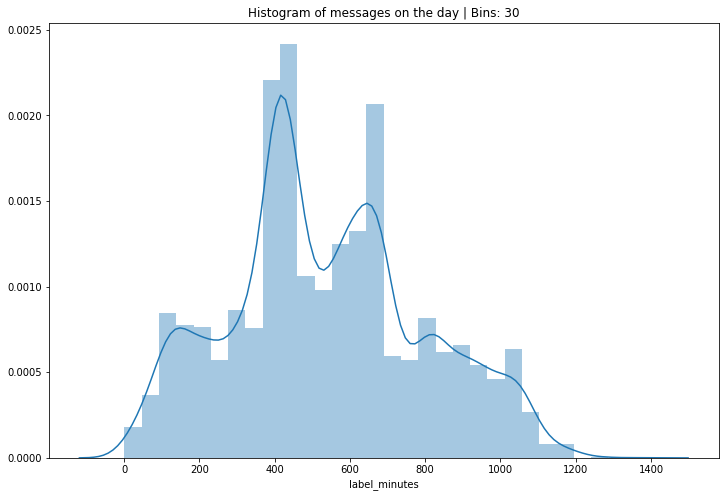

In [24]:
number_bins = 30
plt.figure(figsize=(12, 8))
sns.distplot(df['label_minutes'], hist = True, kde=True, bins=number_bins)
plt.title('Histogram of messages on the day | Bins: ' + str(number_bins))
plt.show()

In [25]:
df.describe([i/10 for i in range(1, 10)] + [.95, .99])

,label_minutes
count,8040.000000
mean,536.302488
std,257.713775
min,1.000000
10%,185.000000
20%,321.800000
30%,406.000000
40%,433.000000
50%,510.000000
60%,599.000000


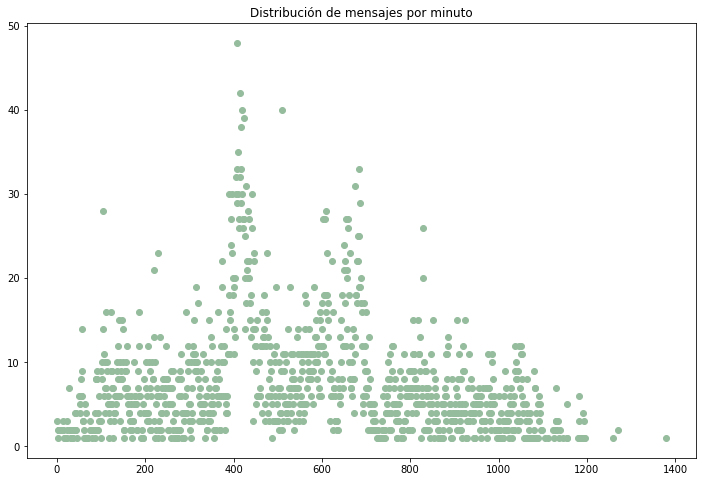

In [26]:
x = df.label_minutes.value_counts().index.tolist()
y = df.label_minutes.value_counts().tolist()

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o', color='#96bc9e')
plt.title('Distribución de mensajes por minuto')
plt.show()

In [27]:
df.head(10)

,date,time,person,message,label_minutes
0,2019-03-08,13:14:00,P1,XD,416
1,2019-03-08,13:15:00,P2,Quien es P3 y quien ea P5?,417
2,2019-03-08,13:15:00,P2,🤔,417
3,2019-03-08,13:16:00,P3,<Multimedia omitido>,418
4,2019-03-08,13:17:00,P2,Va jeje,419
5,2019-03-08,13:25:00,P4,Naaa mms P2,427
6,2019-03-08,13:25:00,P4,Jajajaja,427
7,2019-03-08,13:25:00,P4,<Multimedia omitido>,427
8,2019-03-08,13:27:00,P5,<Multimedia omitido>,429
9,2019-03-08,13:29:00,P2,Oooo perdon,431


In [28]:
other_words = ['jajajaaj', 'jajajajajajajaajjaja', 'jaja', 'jajajajajajajajaja', 'jajajajajajja', 'jajajajajaa', 'jajjajajajajaa', 'jajajaaja', 'jajaa', 'jajajajajajajajajajajajajja', 'jajajajajajajajaj', 
              'jajjjaja', 'jajajajajaj', 'jajajjaaj', 'jajajajaja', 'jajajajajajajaja', 'jajajaja', 'jajajaj', 'jajajajajajajajajajajjajaj', 'jajajajaaj', 'jajajaajajaja', 'jajajajajajajajajaajjajaaj', 
              'jajajaajaaja', 'jajajajaajaja', 'jajajajaaja', 'jajajajajajajaajaj', 'jajajajajaja', 'jajajaaaja', 'jajajajajajaj', 'jjajajajajajaa', 'jajajaajaja', 'jajajajja', 'jajajajajjajajajajajajajajaj', 
              'jajajjaa', 'jajajajaj', 'jajajajajajajajajaajjaajjajajajajajajajjajajajajajaj', 'jajajajajajajajajajajajajaj', 'jajajajajajajajajajajjaaj', 'jjajajajaaja', 'jajajajajajajaj', 'jajajajajajaja', 
              'jajajajajajajajajaj', 'jajaajajaa', 'jajajajaa', 'jajajajajajajajajja', 'jajaja', 'jajajano', 'jajajajajja', 'Jeje', 'Jejeje', 'Jejejeje', 'jajajja', 'Jajajjajja', 'Jajajjajjajaja', 'Yujuuuu', 
              'Im', 'je', 'sé', 'siii', 'Ok', 'Pa', 'Ne', 'Kike', 'Aguanya', 'amo', 'eh', 'Tss', 'teorema', 'axioma', 'drogo', 'iba', 'Ahh', 'anda', 'pasa', 'ay', 'vale', 'san', 'sale', 'Pos', 'dejar', 'Na', 
              'memes', 'veo', 'llegar', 'número', 'min', 'ten', 'vi', 'Uju', 'Ots', 'Siiiiii', 'Enrique', 'jejejejejeje', 'Naaa', "pa'", 'Chris', 'vava', 'amm', 'ahhh', 'Jo', 'Mmmmm', 'yaaa', 'vavavava', 'Villegas', 
              'Aaaa', 'maj', 'vavavavava', 'ToT', 'já', 'vendé', 'jajjaja', 'Yei', "14'", 'Vaa', 'Khe', 'vaa', 'khe', 'Jejejejeje', 'jajajjaja', 'Dijiste', 'Ohhh', 'Jejejejeje', 'memen', 'GG', 'gg', 'Gg', 'Yaaaa', 
              'Pal', 'Jajajajjajaja', 'tb', 'Quique', 'Oooh', 'ehhh', 'Vaaaaa', 'ahhh', 'jun', 'hahaha', 'Navarrete', 'Jajajajjaa', 'MXN', 'nan', 've', 'ah', 'https']

In [29]:
df_message = df[df['person'] != 'P3'][['person', 'message']]

In [30]:
participants = ['P' + str(i) for i in range(1, 12)]

new_names = dict(zip(participants[:2] + participants[3:], participants[:-1]))

In [31]:
new_names

{'P1': 'P1',
 'P2': 'P2',
 'P4': 'P3',
 'P5': 'P4',
 'P6': 'P5',
 'P7': 'P6',
 'P8': 'P7',
 'P9': 'P8',
 'P10': 'P9',
 'P11': 'P10'}

In [32]:
df_message['person'] = df_message['person'].map(new_names)

In [33]:
df_message = df_message[df_message['message'] != '<Multimedia omitido>'].copy()

df_message.head(12)

,person,message
0,P1,XD
1,P2,Quien es P3 y quien ea P5?
2,P2,🤔
4,P2,Va jeje
5,P3,Naaa mms P2
6,P3,Jajajaja
9,P2,Oooo perdon
10,P2,Siempre contra el negro 😭
11,P4,🥺
13,P4,Que disfruten su fin chicos


# How many paticipants are?

In [34]:
print('There are', df_message['person'].nunique(), 'participants in total.')

There are 10 participants in total.


In [35]:
def extract_text(str):
    return ''.join(c for c in str if c not in emoji.UNICODE_EMOJI)

In [36]:
df_message['message'] = df_message['message'].map(extract_text)

df_message = df_message[~((df_message['message'] == '')|(df_message['message'] == ' '))].copy()

df_message.reset_index(drop=True, inplace=True)

In [37]:
df_message

,person,message
0,P1,XD
1,P2,Quien es P3 y quien ea P5?
2,P2,Va jeje
3,P3,Naaa mms P2
4,P3,Jajajaja
...,...,...
5296,P2,Si como les dije lo que son lunes y martes si ...
5297,P6,Atascado va a estar P5 con los escaneos
5298,P2,Jejejejejeje
5299,P7,Jajajja no mames


## Cloud of Words

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

path = '../../../../Data/stopwords2.txt'
stopword = pd.read_csv(path, encoding = 'latin1', header = None)[0].tolist()

In [40]:
stopword += other_words

cv = CountVectorizer(stop_words = stopword)

wc = WordCloud(stopwords=stopword, background_color = "black", colormap = "Dark2",
               max_font_size=150, random_state=42, width=1200, height=600, max_words=125)

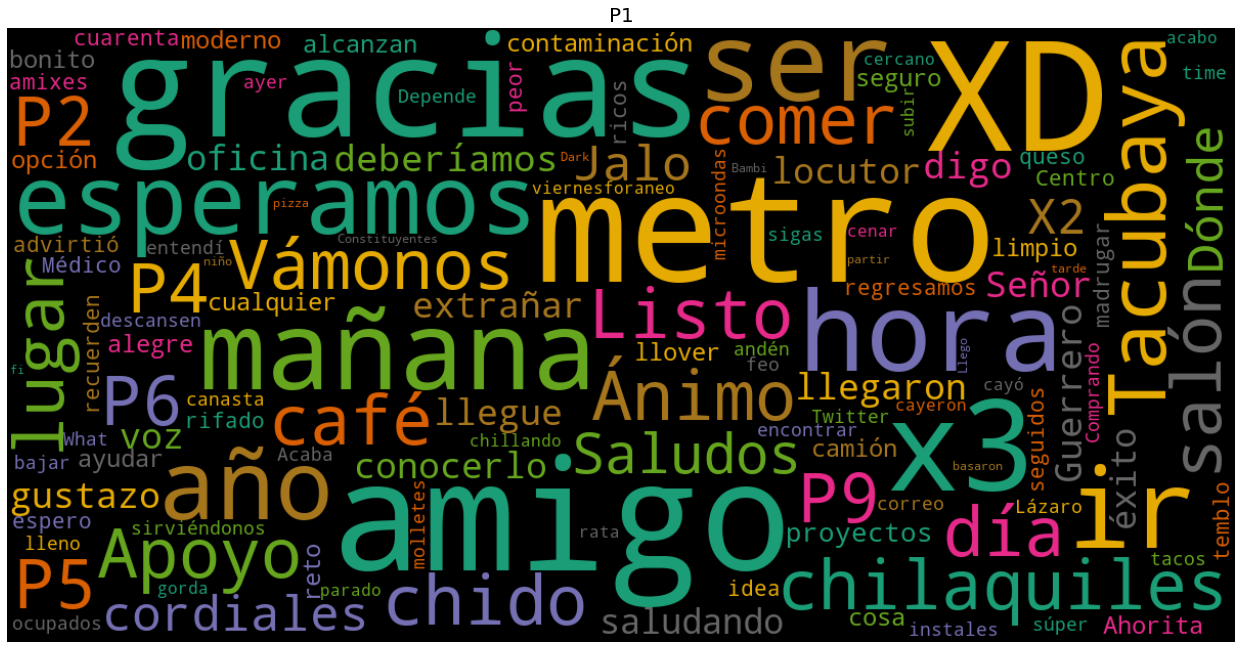

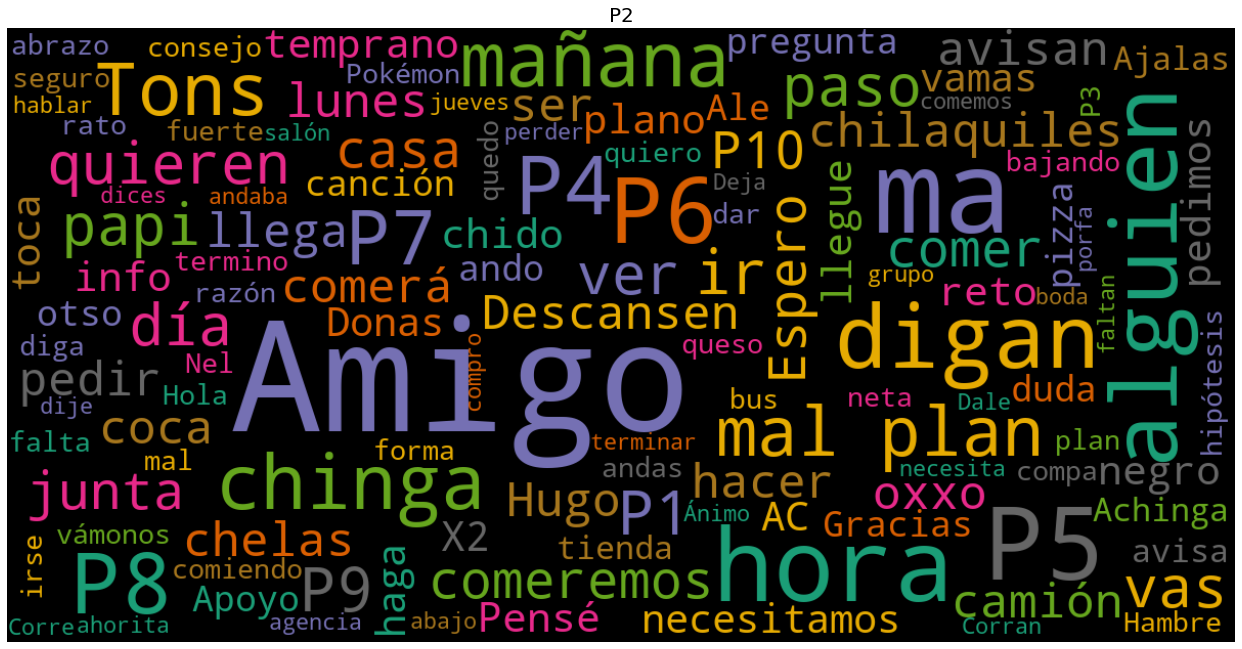

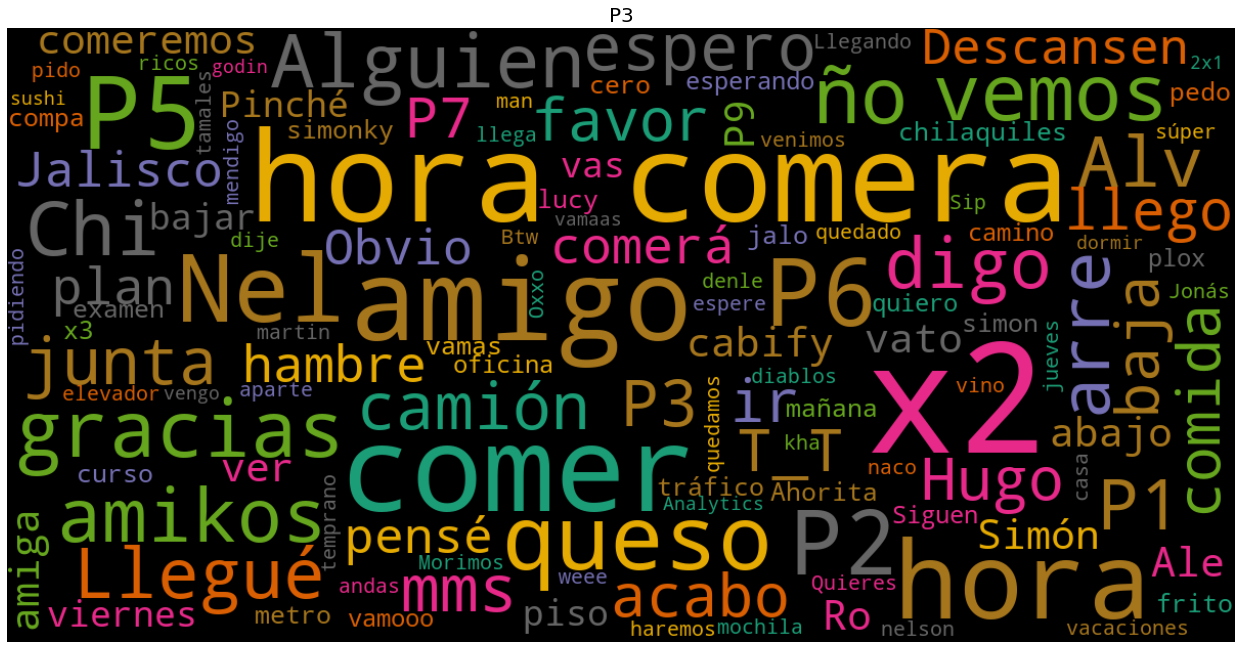

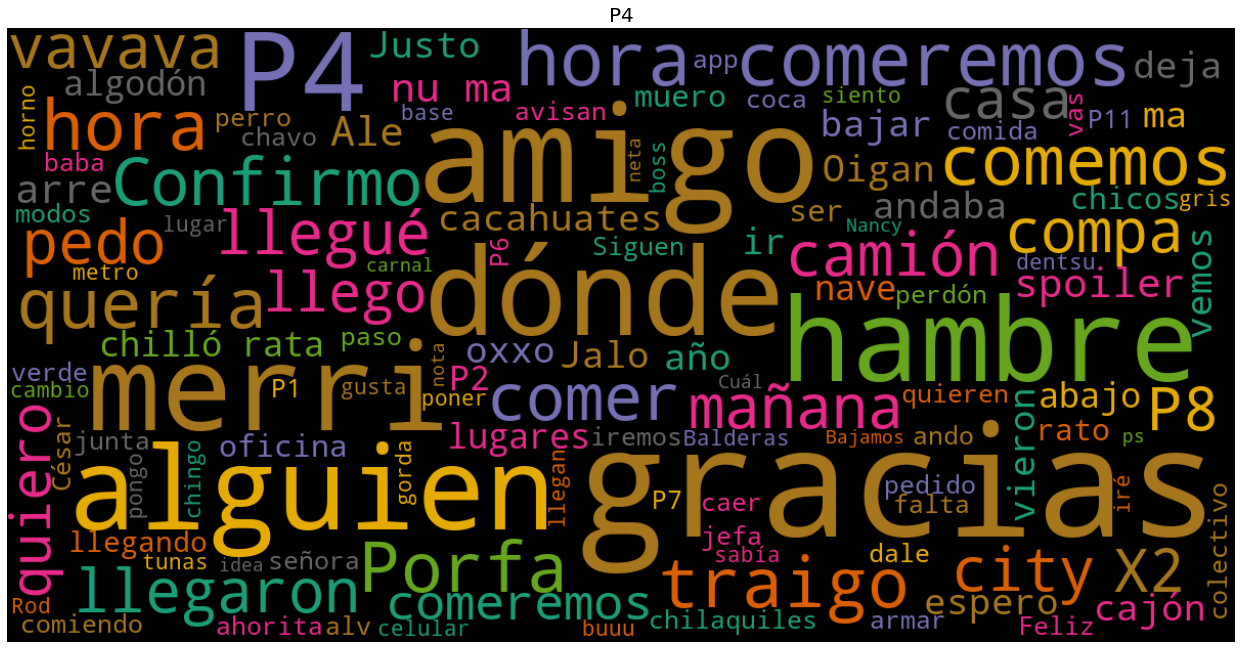

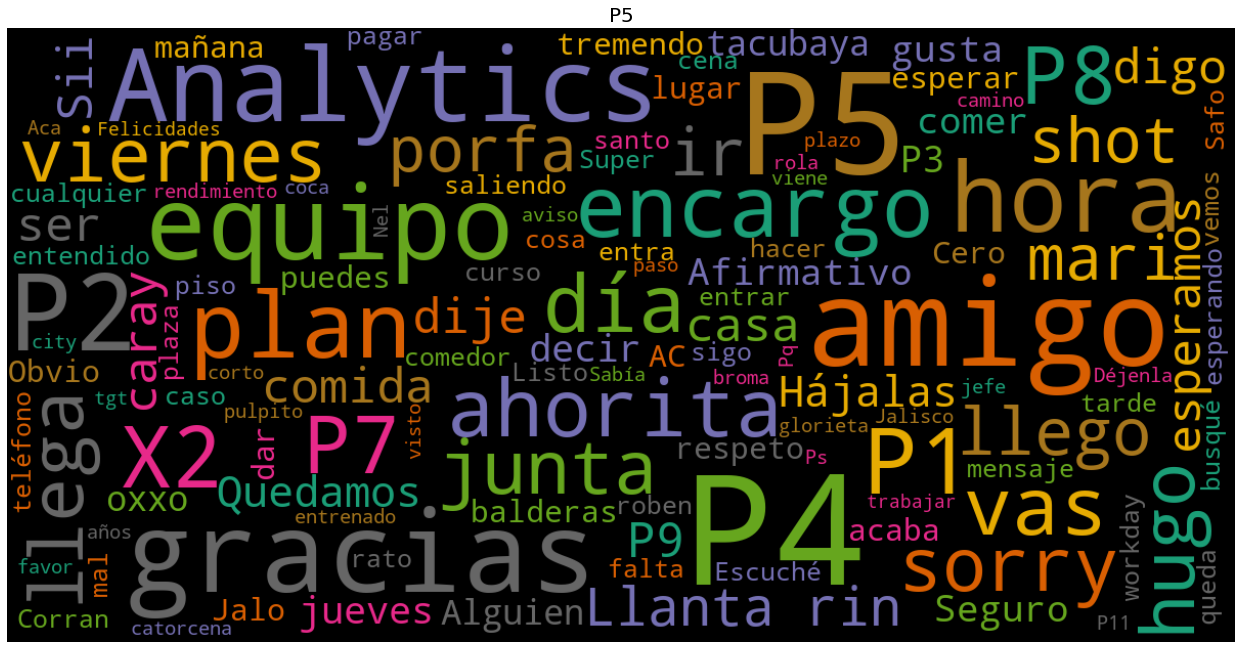

In [ ]:
participants = df_message['person'].unique().tolist()

for person in participants:
    text = ' '
    #print(persona, df_texto[df_texto['persona'] == persona].shape)
    for message in df_message[df_message['person'] == person]['message'].tolist():
        text += message + ' '
    wc.generate(text)
    plt.subplots(figsize = (22, 14))
    plt.imshow(wc)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(person, fontsize = 20)
    plt.show()
    print('\n\n')

# Who sends more messages?

In [ ]:
index_person = df[df['person'] != 'P3']['person'].value_counts().index.tolist()

message_text = df['person'][df['message'] != '<Multimedia omitido>'].value_counts().loc[index_person].tolist()

message_sticker = df['person'][df['message'] == '<Multimedia omitido>'].value_counts().loc[index_person].tolist()

In [ ]:
plt.figure(figsize=(15, 9))
p1 = plt.bar(index_person, message_text, 0.82, color = '#89B59F')
p2 = plt.bar(index_person, message_sticker, 0.82, bottom=message_text, color='#BCDA90')
plt.legend((p1[0], p2[0]), ('Text', 'Stickers'), bbox_to_anchor=(.98, .97), prop={'size': 12})
plt.title('Message by Participant')
plt.show()

In [ ]:
dict_prop = {'Who':[], 'Sticker':[], 'Message':[]}

for stick, txt, pers in zip(message_sticker, message_text, index_person):
    total = stick + txt
    dict_prop['Who'].append(pers)
    dict_prop['Sticker'].append(round(stick/total, 3))
    dict_prop['Message'].append(round(txt/total, 3))

In [ ]:
pd.DataFrame(dict_prop).sort_values('Sticker', ascending=False)

In [ ]:
print(df['date'].min().strftime('%d/%m/%Y'))
print(df['date'].max().strftime('%d/%m/%Y'))

In [ ]:
pd.pivot_table(df, index=['person'], columns=['label_minutes'], aggfunc='count', values='message').fillna(0)

In [ ]:
df['week'] = df['date'].map(lambda x: x.week)

x = df.lab_minutes.value_counts().index.tolist()
y = df.lab_minutes.value_counts().tolist()

In [ ]:
x = df.week.value_counts().index.tolist()
y = df.week.value_counts().tolist()

In [ ]:
df.rename(columns = dict(zip(df.columns.tolist(), ['fecha', 'hora', 'persona', 'mensaje', 'etiq_minutos', 'num_semana'])), inplace=True)

df.to_csv('DataLimpia.csv', index=False, encoding='utf8')

In [ ]:
titulo = ''
color = 'forestgreen'
indice = 'fecha'

# Valores mínimos y máximos
val_min = min(y)
val_max = max(y)

# Pintar los datos
sns.set(style = 'darkgrid', font_scale = 1.4)
plt.subplots(figsize = (21, 9))
sns.lineplot(x = x, y = y, marker = 'o', color = color, markersize = 11, linewidth = 3)

# Nombres
plt.title(titulo, fontsize = 19, weight = 'bold')
if indice == 'fecha':
    # Qué rango y dominio mostrar
    plt.ylim(val_min - 5, val_max + 5)
    plt.xlim(0, len(x) + 1)
    #plt.xticks(x, [x.strftime('%D') for x in Serie.index.tolist()], fontsize = 14.5)
else:
    # Qué rango y dominio mostrar
    plt.ylim(val_min - 1, val_max + 1)
    plt.xlim(0, len(x) + 1)
    plt.xticks(x, range(1, len(y) + 1), fontsize = 14.5)
plt.xticks(rotation = 90)

plt.show()

__________________________

In [ ]:
#pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
pd.pivot_table(df, index=['etiq_minutos'], columns=['persona'], aggfunc='count', values='mensaje').fillna(0)